# Random distribution study
* bandit design을 위해서 random distribution들을 시각화하고, 평균, 중앙값(+quantile), 최빈값등을 구해 비교한다. 
* 정규분포, 베타분포, 지수분포 등을 먼저 test한다.
* 참고블로그 - [Normal Distribution and Beta Distribution: What They Are, and How to Generate Them and Visualize Them in Python](https://medium.com/swlh/normal-distribution-and-beta-distribution-what-they-are-and-how-to-generate-them-and-visualize-f85660f433b1)

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from lib.utils import RandomDistVisTool as dist_vis
import gym
import gym_bandits_lh
%matplotlib inline

In [2]:
# graph visualization options
plt.style.use('fivethirtyeight')
params = {
    'figure.figsize': (15, 8),
    'font.size': 24,
    'legend.fontsize': 20,
    'axes.titlesize': 28,
    'axes.labelsize': 24,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20
}
pylab.rcParams.update(params)
np.set_printoptions(suppress=True)

In [3]:
# hyperparameter for Gaussian
mu = 0.5
sigma = 0.5
n = 1000000

In [4]:
gauss_class = dist_vis(type="gauss", gauss_mean=mu, gauss_sigma=sigma)
gauss_class.generator()

array([-0.21191252,  1.13186423,  0.06466913, ...,  0.57411619,
        0.48538302, -0.13487361])

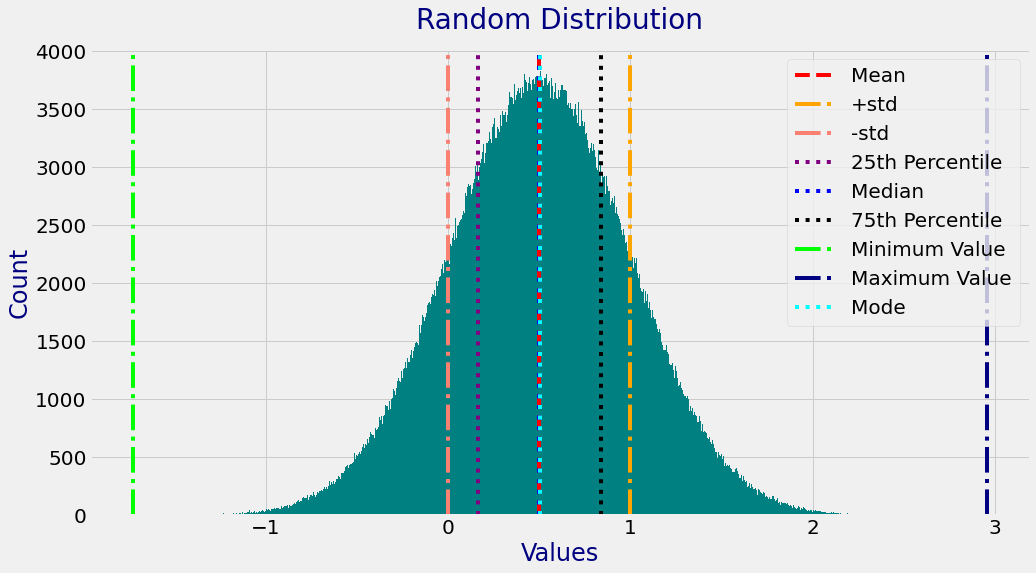

In [5]:
gauss_class.vis()

In [6]:
# hyperparameter for beta distribution and sampling
alpha = 0.5
beta = 0.5
beta_class = dist_vis(type="beta", beta_alpha=alpha, beta_beta=beta)
beta_class.generator()


array([0.3399718 , 0.5800085 , 0.91123768, ..., 0.76443447, 0.91312812,
       0.11878357])

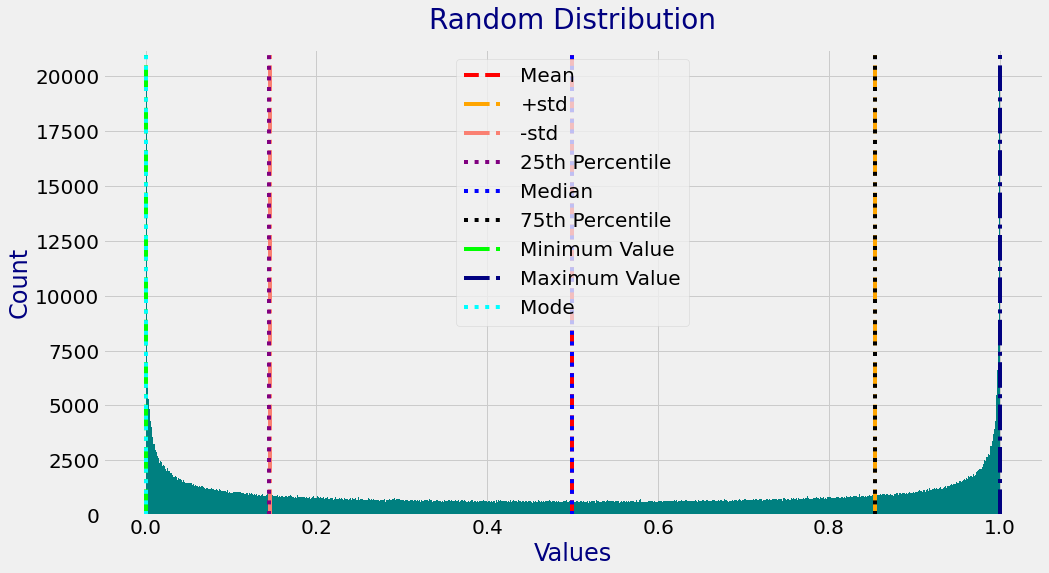

In [7]:
beta_class.vis()

In [8]:
# hyperparameter for exponential distribution and sampling
scale = 0.5
exp_class = dist_vis(type="exp", exp_scale = scale)
exp_class.generator()

array([0.09206628, 0.32251353, 2.34510935, ..., 0.06127181, 0.12314685,
       0.1275928 ])

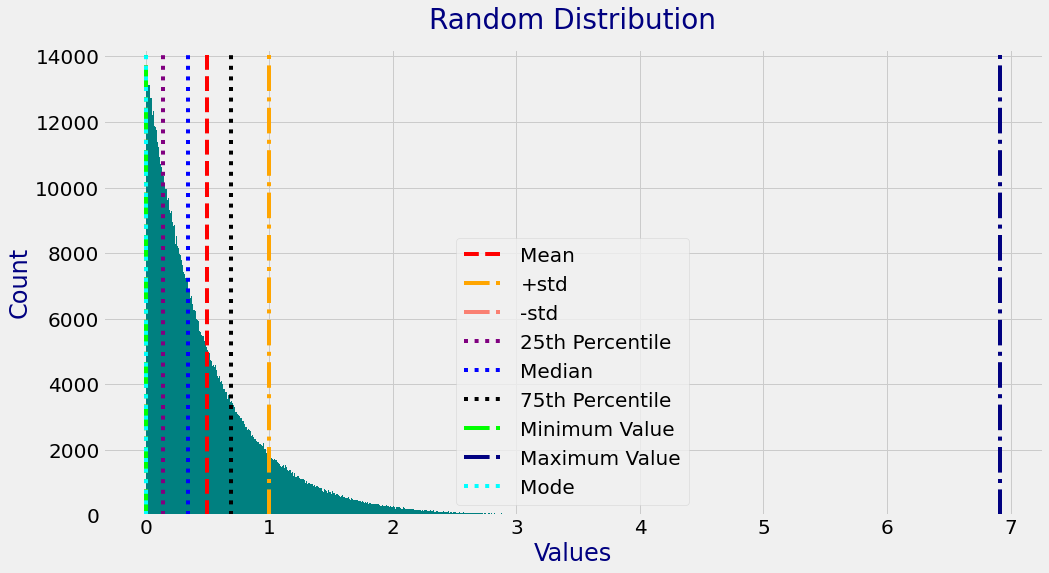

In [9]:
exp_class.vis()

In [10]:
exp_class.statics_summary()

(['Mean',
  '+std',
  '-std',
  '25th Percentile',
  'Median',
  '75th Percentile',
  'Minimum Value',
  'Maximum Value',
  'Mode'],
 [0.5003490941918816,
  1.0007493729840475,
  -5.1184600284526205e-05,
  0.14379749581104065,
  0.34622047001357176,
  0.6940474810827839,
  6.771601385121822e-08,
  6.913389008067439,
  6.771601385121822e-08])

In [11]:
env = gym.make('BanditTenArmedGaussian-v0')
print('Probability of reward:', env.p_dist)
print('Reward:', env.r_dist)

Probability of reward: [1 1 1 1 1 1 1 1 1 1]
Reward: [[-0.1206497450954135, 1], [0.12748843901236553, 1], [0.9782078561179203, 1], [0.8667049778828524, 1], [-0.7429867714338635, 1], [-1.2306780253829923, 1], [0.475583783345265, 1], [0.11960551822793081, 1], [-0.3394644921423284, 1], [0.12411007504793956, 1]]


In [17]:
# test for same mean but different variation for Gauassian bandit
print("shape of reward distribution: {}".format(np.shape(env.r_dist)))
new_r_dist = []
for _ in range(10):
    new_r_dist.append([1, np.random.uniform()])
env.r_dist = new_r_dist
env.r_dist

shape of reward distribution: (10, 2)


[[1, 0.5192665548908418],
 [1, 0.284282555245831],
 [1, 0.5696523147608301],
 [1, 0.10030610935393558],
 [1, 0.03286779520793681],
 [1, 0.4457384779885202],
 [1, 0.6575819506314993],
 [1, 0.5918695647659324],
 [1, 0.39288011090287844],
 [1, 0.3834634959800992]]